<a href="https://colab.research.google.com/github/Sizwe100/Python-Random-Forest/blob/main/SPEI_and_SPI_UVS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --force-reinstall pandas
!pip install --upgrade numpy
!pip install --upgrade --force-reinstall numpy
!pip install --upgrade --force-reinstall matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1

  Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.1 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.2 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 3.8 MB/s eta 0:00:00
  Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.2/355.2 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 48.4 MB/s eta 0:00:00
Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 110.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 9.6 MB/s eta 0:00:00
Using cached python_date

In [1]:
import pandas as pd  # Add this line at the beginning of your script
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving MonthlyDataLCUVS2.csv to MonthlyDataLCUVS2.csv


In [3]:
# Assuming you've already loaded your DataFrame (df) from a CSV file because data is separated by semicolon and not "," as expected
try:
    df = pd.read_csv('MonthlyDataLCUVS2.csv', sep=';', encoding='utf-8', engine='python') # added encoding and engine
    df.info()
except (pd.errors.ParserError, TypeError) as e:
    print(f"Error reading CSV: {e}")
    #If error still appears, try another encoding (latin-1, iso-8859-1, etc.) or display a few lines of your file
    with open('MonthlyDataLCUVS2.csv', 'r') as file:
        for i in range(5): #display the first 5 lines to user to review
            print(file.readline())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         58 non-null     object 
 1   SAVI_UVS     58 non-null     float64
 2   MSAVI_UVS    58 non-null     float64
 3   NDVI_UVS     58 non-null     float64
 4   EVI_UVS      58 non-null     float64
 5   RF_UVS       58 non-null     float64
 6   ET_UVS       58 non-null     float64
 7   SPEI3_UVS    58 non-null     float64
 8   SPI3_UVS     58 non-null     float64
 9   VCI_UVS      58 non-null     float64
 10  Nino3.4_UVS  58 non-null     float64
 11  DMI_UVS      58 non-null     float64
 12  SAVI_LC      58 non-null     float64
 13  MSAVI_LC     58 non-null     float64
 14  NDVI_LC      58 non-null     float64
 15  EVI_LC       58 non-null     float64
 16  RF_LC        58 non-null     float64
 17  ET_LC        58 non-null     float64
 18  SPEI3_LC     58 non-null     float64
 19  SPI3_LC   

In [4]:
# Convert Date column to datetime and extract year-month for labels
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')
dates = df['Date'].dt.strftime('%Y-%m')

In [5]:
df = pd.read_csv("MonthlyDataLCUVS2.csv", sep=";", parse_dates=['Date'])

# Reset the index to turn the first column (currently index) into a column
# This line is not needed since we are not setting the Date column as index initially
# df.reset_index(inplace=True)

# Convert the 'Date' column to datetime if it's not already
# This line is also not needed if parse_dates is used correctly
# df['Date'] = pd.to_datetime(df['Date'])

# Check the result
print(df.head())
print(df.info())

        Date  SAVI_UVS  MSAVI_UVS  NDVI_UVS   EVI_UVS    RF_UVS    ET_UVS  \
0 2019-03-31  0.423300   0.415157  0.614560  0.456100  3.494194  3.793974   
1 2019-04-30  0.423543   0.413157  0.580767  0.475743  2.294667  2.762200   
2 2019-05-31  0.370256   0.353178  0.524160  0.418975  0.300000  2.525832   
3 2019-06-30  0.376910   0.358730  0.499500  0.389600  0.400333  2.230383   
4 2019-07-31  0.354780   0.333070  0.431640  0.368830  0.238065  2.541484   

   SPEI3_UVS  SPI3_UVS   VCI_UVS  ...  MSAVI_LC   NDVI_LC    EVI_LC     RF_LC  \
0   1.101960  0.300789  0.371444  ...  0.379540  0.614560  0.596020  5.594616   
1   0.097428  0.301395  0.468333  ...  0.327233  0.580767  0.533050  2.531303   
2   1.119261  0.555210  0.586455  ...  0.288100  0.524160  0.511700  0.212613   
3  -5.649626 -5.362104  0.735636  ...  0.259189  0.499500  0.442189  0.287013   
4  -1.544766 -2.368804  0.505455  ...  0.223150  0.431640  0.386030  0.193048   

      ET_LC  SPEI3_LC   SPI3_LC  VCI_LC  Nino3.4_L

In [6]:
# Assuming the CSV has 'Year' and 'ENSO_Index' columns
df = pd.read_csv(list(uploaded.keys())[0]) # This line might be causing the error
# print(df.head()) # Use this to confirm the data

# Assuming the CSV has 'Year' and 'ENSO_Index' columns
df = pd.read_csv(list(uploaded.keys())[0]) # This line might be causing the error
print(df.head()) # Use this to confirm the data

  Date;SAVI_UVS;MSAVI_UVS;NDVI_UVS;EVI_UVS;RF_UVS;ET_UVS;SPEI3_UVS;SPI3_UVS;VCI_UVS;Nino3.4_UVS;DMI_UVS;SAVI_LC;MSAVI_LC;NDVI_LC;EVI_LC;RF_LC;ET_LC;SPEI3_LC;SPI3_LC;VCI_LC;Nino3.4_LC;DMI_LC
0  2019/03/31;0.42329999999999995;0.4151571428571...                                                                                                                                         
1  2019/04/30;0.4235428571428571;0.41315714285714...                                                                                                                                         
2  2019/05/31;0.37025555555555556;0.3531777777777...                                                                                                                                         
3  2019/06/30;0.37690999999999997;0.35873;0.4995;...                                                                                                                                         
4  2019/07/31;0.35478;0.33307000000000003;0.43163.

In [7]:

# Assuming you've already loaded your DataFrame (df) from a CSV file because data is separated by semicolon and not "," as expected
# This was replaced with your uploaded file for testing
#df = pd.read_csv('MonthlyRemoteSensingData3_Mtuba.csv', sep=';')
df = pd.read_csv(list(uploaded.keys())[0], sep=';') # use uploaded file and use ; as separator
df.info()
# Assuming the CSV has 'date' and 'Nino3.4' columns
# These next two lines were removed to prevent overwriting the DataFrame.
#df = pd.read_csv(list(uploaded.keys())[0]) # This line might be causing the error
#print(df.head()) # Use this to confirm the data
# Check if 'date' column exists, if not, check df.columns for the correct column name
if 'date' in df.columns:
    years = df['date']
else:
    print(f"Column 'date' not found. Available columns: {df.columns}")
    # Replace 'correct_column_name' with the actual column containing the years
   # date = df['date']
# Check if 'Nino3.4' is present in the columns
if 'SPEI3' in df.columns:
    enso_indices = df['SPEI3']
else:
    print(f"Column 'SPEI3' not found. Available columns: {df.columns}")
    # If not found, you'll need to correct the column name or find an alternative
    # For demonstration, let's assume 'ENSO_Index' is the correct name:
    # enso_indices = df['ENSO_Index']
# ... rest of your plotting code ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         58 non-null     object 
 1   SAVI_UVS     58 non-null     float64
 2   MSAVI_UVS    58 non-null     float64
 3   NDVI_UVS     58 non-null     float64
 4   EVI_UVS      58 non-null     float64
 5   RF_UVS       58 non-null     float64
 6   ET_UVS       58 non-null     float64
 7   SPEI3_UVS    58 non-null     float64
 8   SPI3_UVS     58 non-null     float64
 9   VCI_UVS      58 non-null     float64
 10  Nino3.4_UVS  58 non-null     float64
 11  DMI_UVS      58 non-null     float64
 12  SAVI_LC      58 non-null     float64
 13  MSAVI_LC     58 non-null     float64
 14  NDVI_LC      58 non-null     float64
 15  EVI_LC       58 non-null     float64
 16  RF_LC        58 non-null     float64
 17  ET_LC        58 non-null     float64
 18  SPEI3_LC     58 non-null     float64
 19  SPI3_LC   

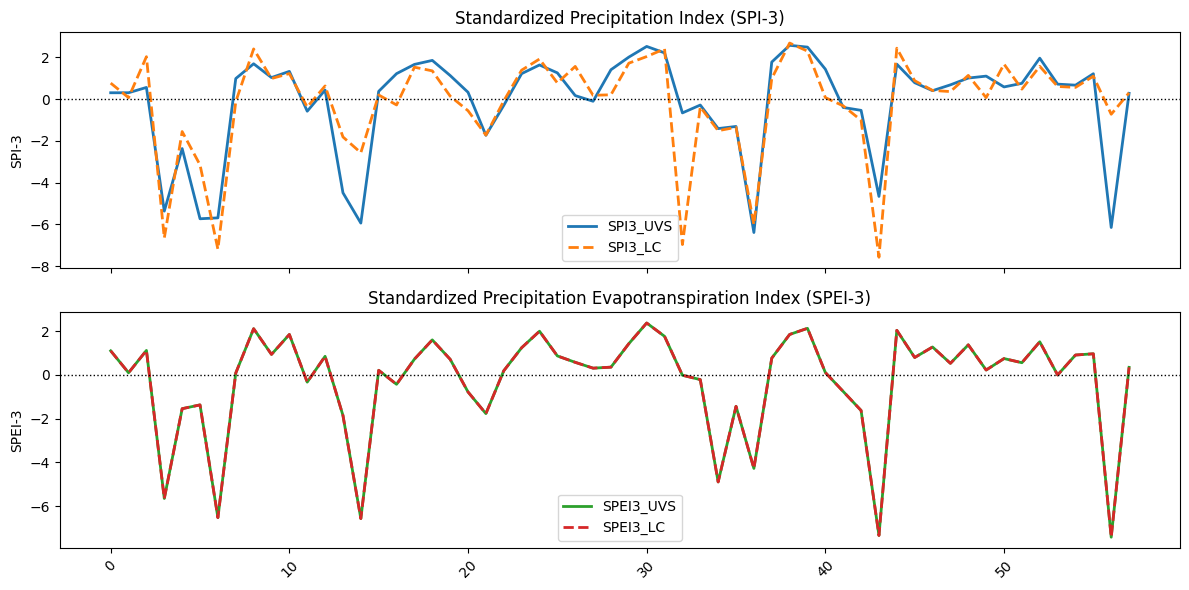

In [8]:
# Plot
fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# SPI plot
axs[0].plot(df.index, df['SPI3_UVS'], label='SPI3_UVS', color='tab:blue', linewidth=2)
axs[0].plot(df.index, df['SPI3_LC'], label='SPI3_LC', color='tab:orange', linestyle='--', linewidth=2)
axs[0].axhline(0, color='black', linestyle=':', linewidth=1)
axs[0].set_ylabel('SPI-3')
axs[0].legend()
axs[0].set_title('Standardized Precipitation Index (SPI-3)')

# SPEI plot
axs[1].plot(df.index, df['SPEI3_UVS'], label='SPEI3_UVS', color='tab:green', linewidth=2)
axs[1].plot(df.index, df['SPEI3_LC'], label='SPEI3_LC', color='tab:red', linestyle='--', linewidth=2)
axs[1].axhline(0, color='black', linestyle=':', linewidth=1)
axs[1].set_ylabel('SPEI-3')
axs[1].legend()
axs[1].set_title('Standardized Precipitation Evapotranspiration Index (SPEI-3)')

# Format x-axis
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

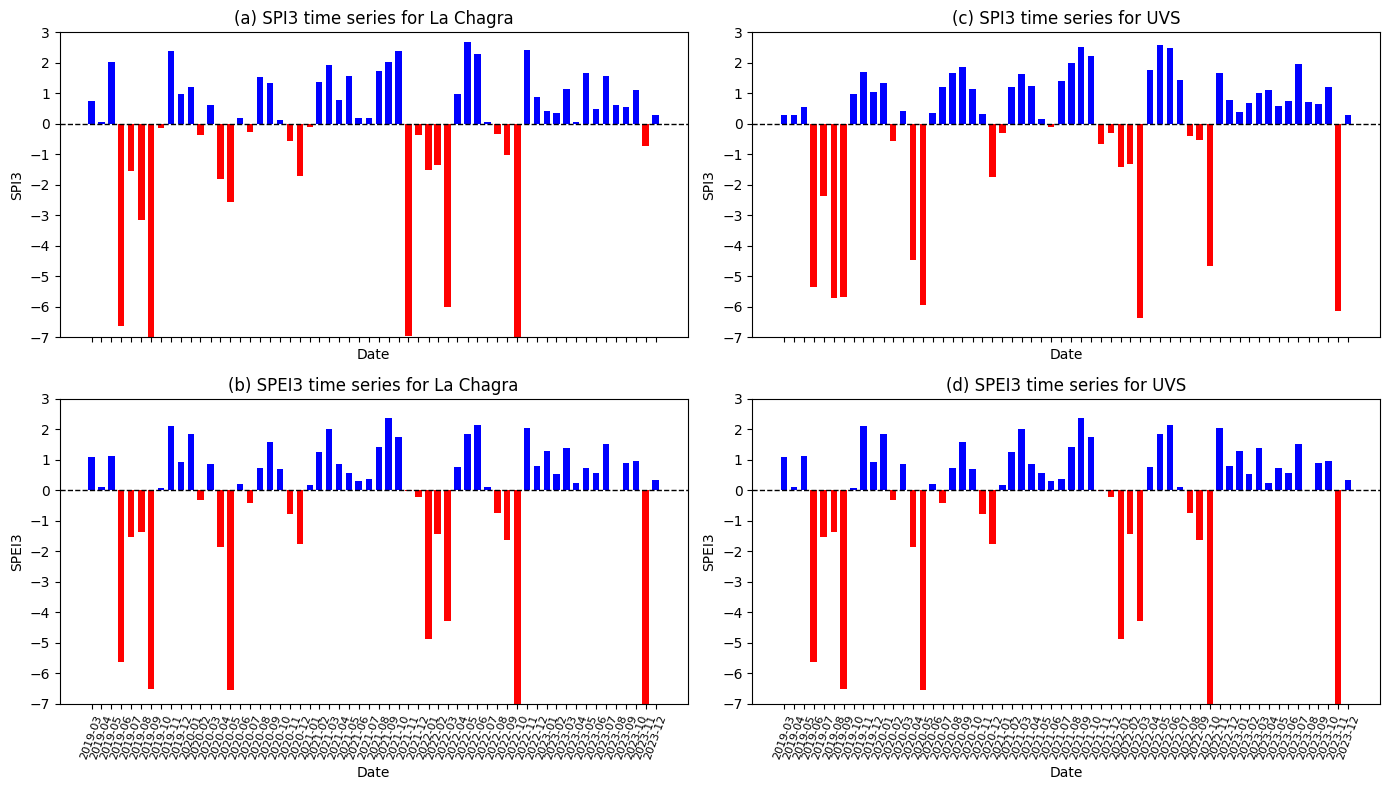

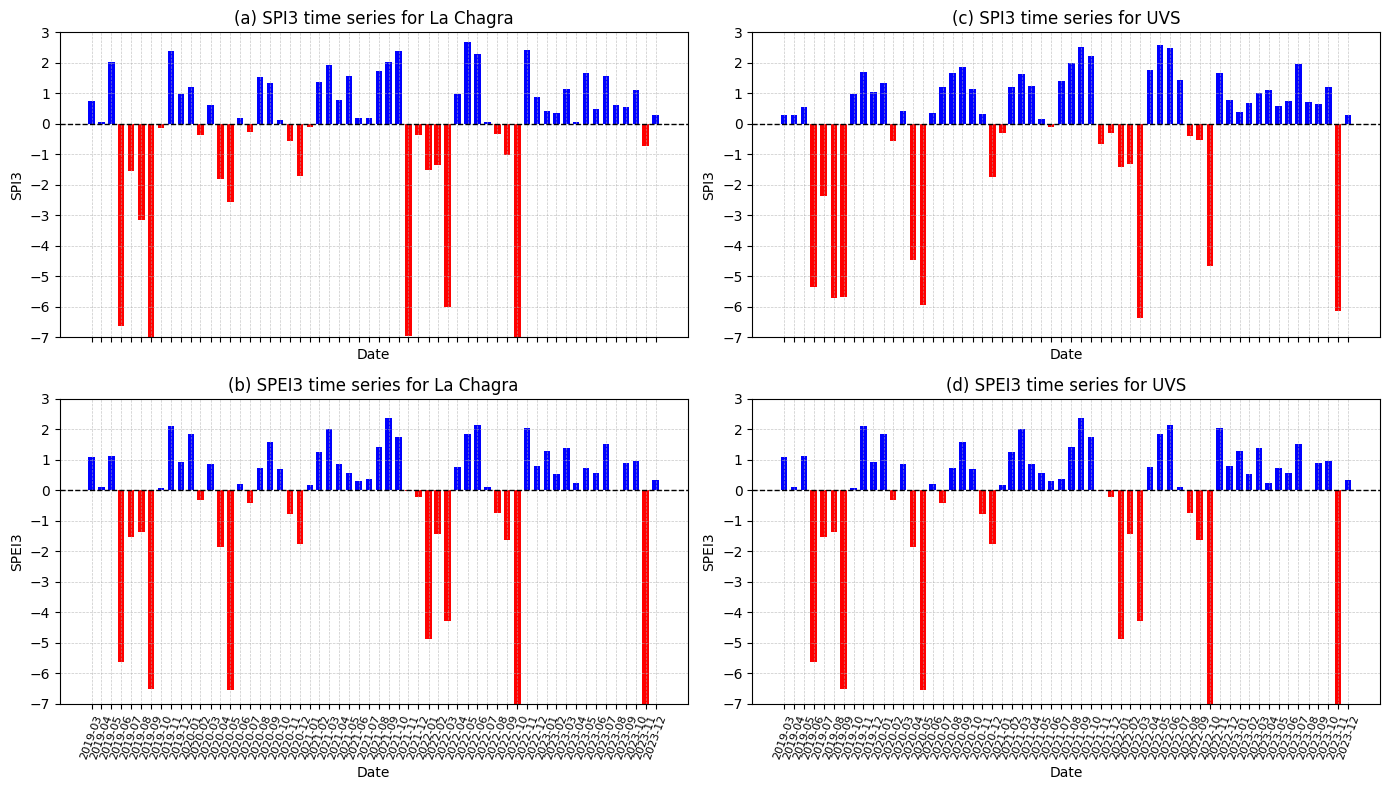

In [ ]:
# Create figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=True)

# Define plot config function
def plot_spi_spei(ax, series, label):
    colors = ['red' if v < 0 else 'blue' for v in series]
    ax.bar(df['Date'], series, color=colors, width=20)
    ax.axhline(0, color='black', linestyle='--', linewidth=1)
    ax.set_ylabel(label)
    ax.set_ylim(-7, 3) # Set the y-axis limits to -7 and 3
    ax.set_xticks(df['Date'])
    ax.set_xticklabels([d.strftime('%Y-%m') for d in df['Date']], rotation=70, fontsize=8)
    ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
    ax.set_yticks([-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3]) # Add labels for -7 and 3

# Top-left: (a) SPI3 La Chagra (LC)
axs[0, 0].set_title('(a) SPI3 time series for La Chagra')
plot_spi_spei(axs[0, 0], df['SPI3_LC'], 'SPI3')

# Top-right: (c) SPI3 UVS
axs[0, 1].set_title('(c) SPI3 time series for UVS')
plot_spi_spei(axs[0, 1], df['SPI3_UVS'], 'SPI3')

# Bottom-left: (b) SPEI3 La Chagra (LC)
axs[1, 0].set_title('(b) SPEI3 time series for La Chagra')
plot_spi_spei(axs[1, 0], df['SPEI3_LC'], 'SPEI3')

# Bottom-right: (d) SPEI3 UVS
axs[1, 1].set_title('(d) SPEI3 time series for UVS')
plot_spi_spei(axs[1, 1], df['SPEI3_UVS'], 'SPEI3')

# Common x-label
for row_axs in axs:
    for ax in row_axs:
      ax.set_xlabel('Date')


plt.tight_layout()
plt.show()

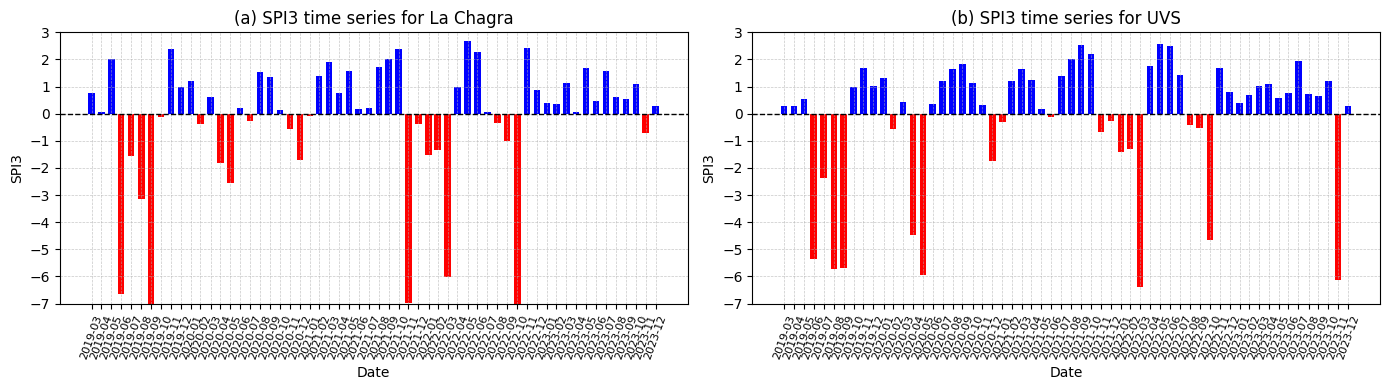

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Create figure with 1 row and 2 subplots (SPI3_LC and SPI3_UVS)
fig, axs = plt.subplots(1, 2, figsize=(14, 4), sharex=True)

# Define SPI3 plotting function with grid
def plot_spi(ax, series, label, title):
    colors = ['red' if v < 0 else 'blue' for v in series]
    ax.bar(df['Date'], series, color=colors, width=20)
    ax.axhline(0, color='black', linestyle='--', linewidth=1)
    ax.set_ylabel(label)
    ax.set_ylim(-7, 3)
    ax.set_yticks(range(-7, 4))
    ax.set_xticks(df['Date'])
    ax.set_xticklabels([d.strftime('%Y-%m') for d in df['Date']], rotation=70, fontsize=8)
    ax.set_title(title)
    ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
    ax.set_xlabel('Date')

# (a) SPI3 for La Chagra
plot_spi(axs[0], df['SPI3_LC'], 'SPI3', '(a) SPI3 time series for La Chagra')

# (b) SPI3 for UVS
plot_spi(axs[1], df['SPI3_UVS'], 'SPI3', '(b) SPI3 time series for UVS')

# Adjust layout
plt.tight_layout()
plt.show()


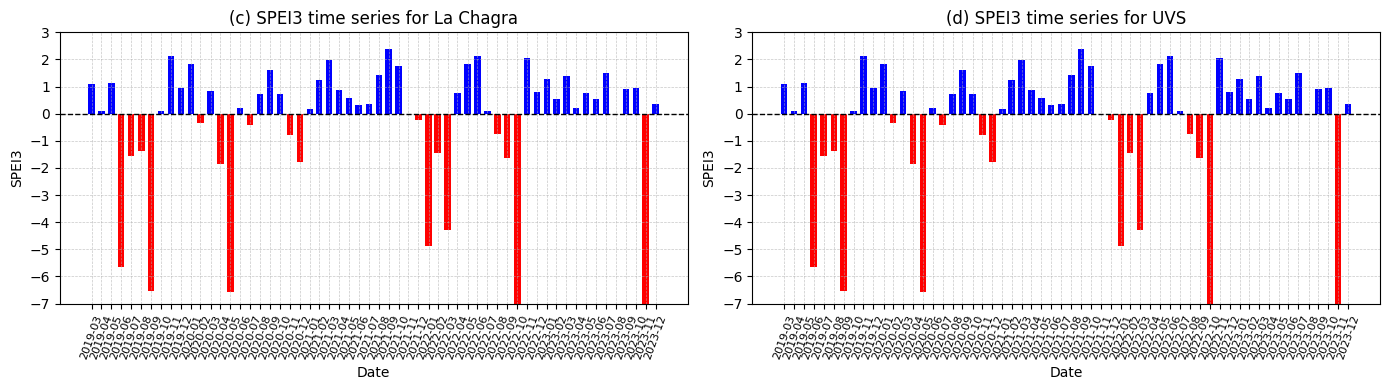

In [ ]:
# Create figure with 1 row and 2 subplots (SPEI3_LC and SPEI3_UVS)
fig, axs = plt.subplots(1, 2, figsize=(14, 4), sharex=True)

# Define SPEI3 plotting function
def plot_spei(ax, series, label, title):
    colors = ['red' if v < 0 else 'blue' for v in series]
    ax.bar(df['Date'], series, color=colors, width=20)
    ax.axhline(0, color='black', linestyle='--', linewidth=1)
    ax.set_ylabel(label)
    ax.set_ylim(-7, 3)
    ax.set_yticks(range(-7, 4))
    ax.set_xticks(df['Date'])
    ax.set_xticklabels([d.strftime('%Y-%m') for d in df['Date']], rotation=70, fontsize=8)
    ax.set_title(title)
    ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
    ax.set_xlabel('Date')

# (a) SPEI3 for La Chagra
plot_spei(axs[0], df['SPEI3_LC'], 'SPEI3', '(c) SPEI3 time series for La Chagra')

# (b) SPEI3 for UVS
plot_spei(axs[1], df['SPEI3_UVS'], 'SPEI3', '(d) SPEI3 time series for UVS')

# Adjust layout
plt.tight_layout()
plt.show()